**Research Question:** How did viewers respond to Warner Bros. “A Minecraft Movie | Official Trailer?” over time, and what patterns emerged in user engagement?


---



The dataset contains 1,000 YouTube comments collected from the official Minecraft movie trailer, including timestamps, likes, replies, and author data.

# Step 1. Getting Comments Data using YouTube API

In [2]:
# Setting Up the YouTube API and Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
youtube = build('youtube', 'v3', developerKey='YOUTUBE_API_KEY')
video_id = "wJO_vIDZn-I" # This is the video id for Minecraft trailer

# Step 2. Collecting YouTube Data Comments

In [27]:
# Let's collect 1000 comments: Comment text, Author, # of likes, Published date, Channel ID, and # of Replies.
def get_video_comments(video_id, max_comments=1000):
    comments = []  # Store comment data
    max_comments = min(max_comments, 1000)  # Limit to 1000 comments

    # Initial API request to get the first batch of comments
    request = youtube.commentThreads().list(
        part="snippet",
        videoId=video_id,
        maxResults=min(max_comments, 100),  # API limit per request is 100
        textFormat="plainText"
    )

    # Define timezone-aware date range
    start_date = pd.Timestamp('2024-11-19', tz='UTC')
    end_date = pd.Timestamp('2025-03-01', tz='UTC')

    while request and len(comments) < max_comments:
        response = request.execute()

        # Extract comment details from the API response
        for item in response.get('items', []):  # Use .get() to prevent KeyError
            comment = item['snippet']['topLevelComment']['snippet']
            published_at = pd.to_datetime(comment.get('publishedAt'))

            # Filter comments by specified timezone-aware date range
            if not (start_date <= published_at <= end_date):
                continue  # Skip comments outside the specified range

            reply_count = item['snippet'].get('totalReplyCount', 0)  # Prevents missing key error
            comments.append({
                'comment_text': comment.get('textDisplay', ""),  # Default to empty string if missing
                'author': comment.get('authorDisplayName', "Unknown"),  # Handle missing author names
                'likes': comment.get('likeCount', 0),  # Defaults to 0
                'published_at': published_at,  # Handle missing timestamps
                'channel_id': comment.get('authorChannelId', {}).get('value', None),  # Prevent KeyError
                'reply_count': reply_count  # Number of replies
            })

            # Stop looping if max_comments is reached
            if len(comments) >= max_comments:
                break

        # Stop fetching new pages if max_comments is reached
        if len(comments) >= max_comments:
            break

        # Get the next batch of comments if available
        request = youtube.commentThreads().list_next(request, response)

    return pd.DataFrame(comments)

# Fetch comments and store in DataFrame
df = get_video_comments(video_id, 1000)

In [28]:
# Let's see the result: 1000 comments text, author, # of likes, published date, channel ID, and # of replies.
df.head(30)
len(df)

1000

# Step 3. Cleaning and Selecting Data

In [29]:
# Filter out irrelevant comments or those that lack substantive content.
# Exclude comments with fewer than 10 words.

word_threshold = 10 # filter #of words count
filtered_df = df[df['comment_text'].str.split().str.len() >= word_threshold].copy() # Add .copy() here.

# This provides a dataset of comments that contain substantive text and were posted during the whole period of vidoe release.

In [30]:
# See how many rows (comments) in the filtered dataset.
len(filtered_df)

402

In [31]:
# We have a total of 402 comments in filtered_df: more than 10 words, posted from the first release date to today.

# Step 4. Sorting Data by Engagement (# of Likes and Replies)

In [47]:
#Sort comments by number of likes, replies and comments (ascending and descending order)

# Select the 'comment_text', 'likes', and 'published_at' columns and sort by 'likes'
sorted_likes_df = filtered_df[['comment_text', 'likes', 'published_at']].sort_values(by='likes', ascending=False)

# Select the 'comment_text', 'reply_count', and 'published_at' columns and sort by 'reply_count'
sorted_replies_df = filtered_df[['comment_text', 'reply_count', 'published_at']].sort_values(by='reply_count', ascending=False)

# Sort comments by date, newest first
sorted_by_date_df = filtered_df.sort_values(by='published_at', ascending=False)




In [60]:
#Preview the top 50 most liked comments
sorted_likes_df.head(50)

,comment_text,likes,published_at
340,This feels more like a clash of clans movie ho...,1741,2025-02-16 04:56:38+00:00
79,i dont think my computer will be able to handl...,1116,2025-02-27 16:25:05+00:00
529,Warner Bros is now claiming ownership of C418'...,883,2025-02-10 18:44:29+00:00
955,"“You were supposed to be a hero, Brian!”\n\n*B...",405,2025-01-21 21:28:04+00:00
517,C418's music is not yours and is copyright fre...,350,2025-02-10 23:46:16+00:00
501,"Hey, actually C418 actually still has rights t...",315,2025-02-11 07:31:09+00:00
84,“there’s one thing you need to know…”\n\n“neve...,217,2025-02-27 11:42:16+00:00
555,They’re totally gonna say “lets kick it up a *...,81,2025-02-09 23:01:03+00:00
521,STOP COPYWRITING C418'S MUSIC ON OTHER PEOPLES...,70,2025-02-10 21:31:11+00:00
938,"""Anything you can dream about here... you can ...",56,2025-01-22 19:41:09+00:00


In [59]:
sorted_likes_df.tail(1000)
# This preview shows that most of comments (204 - 402) have no likes.

,comment_text,likes,published_at
340,This feels more like a clash of clans movie ho...,1741,2025-02-16 04:56:38+00:00
79,i dont think my computer will be able to handl...,1116,2025-02-27 16:25:05+00:00
529,Warner Bros is now claiming ownership of C418'...,883,2025-02-10 18:44:29+00:00
955,"“You were supposed to be a hero, Brian!”\n\n*B...",405,2025-01-21 21:28:04+00:00
517,C418's music is not yours and is copyright fre...,350,2025-02-10 23:46:16+00:00
...,...,...,...
904,"I will be honest, it might be fun but minecraf...",0,2025-01-24 23:48:25+00:00
32,I love films where the main villain is child l...,0,2025-02-28 12:03:33+00:00
30,No cuz I’m actually so excited to see Jason ma...,0,2025-02-28 12:42:14+00:00
23,Using the children yearn for the mines meme is...,0,2025-02-28 15:07:12+00:00


In [35]:
#Preview the top 50 most replied-to comments
sorted_replies_df.head(50)

,comment_text,reply_count,published_at
517,C418's music is not yours and is copyright fre...,21,2025-02-10 23:46:16+00:00
340,This feels more like a clash of clans movie ho...,13,2025-02-16 04:56:38+00:00
536,You can't just copyright claim C418's music wi...,11,2025-02-10 16:43:55+00:00
521,STOP COPYWRITING C418'S MUSIC ON OTHER PEOPLES...,10,2025-02-10 21:31:11+00:00
501,"Hey, actually C418 actually still has rights t...",9,2025-02-11 07:31:09+00:00
529,Warner Bros is now claiming ownership of C418'...,8,2025-02-10 18:44:29+00:00
955,"“You were supposed to be a hero, Brian!”\n\n*B...",6,2025-01-21 21:28:04+00:00
79,i dont think my computer will be able to handl...,6,2025-02-27 16:25:05+00:00
880,I was in my local Fairhope Ravenite Pizzeria w...,5,2025-01-25 22:57:12+00:00
644,This movie still sucks. You guys switch up so ...,4,2025-02-05 13:58:54+00:00


In [57]:
sorted_replies_df.tail(200)
# This preview shows that most of comments have no replies.

,comment_text,reply_count,published_at
161,When I was a kid I yearned for child labor,0,2025-02-23 06:32:09+00:00
165,They dropped this before an actual good Minecr...,0,2025-02-23 03:28:29+00:00
168,잘구현했어요 마인크래프트 영화 기대됩니다 게임그대로의 음악 특징 잘 살려서 만들어주...,0,2025-02-23 01:34:52+00:00
169,Never thought I'd see Pippa Fitz-Amobi in a mi...,0,2025-02-23 00:30:19+00:00
170,"""As a Child, I yearn for the mines""\n*Muffled ...",0,2025-02-22 22:32:21+00:00
...,...,...,...
906,I can’t believe all they had to say is “yearne...,0,2025-01-24 22:09:04+00:00
917,"“Anything you can dream about here, you can ma...",0,2025-01-24 04:57:02+00:00
921,This just went to the top of my watch list🎉😁😍,0,2025-01-23 21:51:23+00:00
932,"I hope that ""Hip To Be Square"" by Huey Lewis &...",0,2025-01-23 01:41:44+00:00


In [37]:
# Preview the top 50 newest comments
sorted_by_date_df.head(50)

,comment_text,author,likes,published_at,channel_id,reply_count
4,Sabes algo sácame película de 2026 Siri porque...,@SoybenjamilloYT,0,2025-02-28 20:31:04+00:00,UCxRruh91nJzeqYZMs23XuyQ,0
7,Isn’t Steve supposed to be 2 meters tall not t...,@jackhousser2817,3,2025-02-28 20:09:06+00:00,UC3l2E8ifRh05cug5rO03KCw,0
12,"The weird thing is, the piglins which come int...",@artsjam8845,2,2025-02-28 18:41:12+00:00,UCaCSz7hO43phJlfG010G_ew,1
17,"Warner Brothers, you our mine crafted the game...",@CJamesArt,0,2025-02-28 16:37:36+00:00,UCee0U33Z6kdny7D4FrGRxSg,0
18,"You know what, this movie is gonna be a guilty...",@haileykitty6993,0,2025-02-28 16:12:05+00:00,UCWCkP42Jjp3b85aEXRrl1wQ,0
20,They better have pewdiepie in this. Else it’s ...,@nick127-b4n,0,2025-02-28 15:56:30+00:00,UCTAiaCnkSID5AEl-tkyMYzA,0
23,Using the children yearn for the mines meme is...,@damiencrain5804,0,2025-02-28 15:07:12+00:00,UC_JnXpunJc6CCY9VV1AfkIg,0
30,No cuz I’m actually so excited to see Jason ma...,@RANDXM_EDITXZZ,0,2025-02-28 12:42:14+00:00,UC5WvNNgfrpWcCO-4XQj5WFQ,0
32,I love films where the main villain is child l...,@utter_cringe,0,2025-02-28 12:03:33+00:00,UCNqH7TZ8oY78UJk64ipPjZQ,0
37,This is basically a parody of Minecraft instea...,@S0L12D3,0,2025-02-28 10:05:45+00:00,UCELsiOOAiYZvQUR8G9hDQKA,0


In [38]:
# Preview the top 50 oldest comments
sorted_by_date_df.tail(50)

,comment_text,author,likes,published_at,channel_id,reply_count
837,You guys are genuinely destroying Minecraft an...,@Sabengtung,0,2025-01-28 00:51:52+00:00,UC-qkgy05gP1n9TRuBKPKxfQ,1
842,I finally realized something. The reason it is...,@notDonixx,0,2025-01-27 20:57:39+00:00,UCOi-LTL1vDzVvzvNv3eyVWw,0
843,I finally realized something. The reason it is...,@notDonixx,0,2025-01-27 20:57:27+00:00,UCOi-LTL1vDzVvzvNv3eyVWw,0
848,1:33 they haven't notice one thing that when p...,@isuckateverygame-89,0,2025-01-27 15:33:02+00:00,UCbDIm0gLRAo3NPg8C7_ssUg,0
849,Steve es un zombie curado o eso creo no una pe...,@PabloCorbalan-nm3zw,0,2025-01-27 13:28:26+00:00,UC3X8Spta56VVZGTWJSDldqw,0
857,I may boycott it in protest for this movie is ...,@tfduleadership,1,2025-01-27 02:43:42+00:00,UCfNjToHekEWq73r4_nWtIRw,0
860,"the line ""as a child, i yearned for the mines""...",@_harpollo_,0,2025-01-26 22:29:31+00:00,UCEnHNpcKrnrT-IkQcDUAZlw,0
866,this seems like the perfect movie to watch whi...,@gingerfool,1,2025-01-26 15:16:48+00:00,UCtyjg6audMiphHAFWykxfcw,0
875,뭐 이게.. 마인크래프트 진짜 애니메이션.. 뭐 우리 그냥 우리 보면 봤어!!,@nigelsy4427,0,2025-01-26 03:20:17+00:00,UC8ZDPoh1udUaSI0Hgr_pOQg,0
880,I was in my local Fairhope Ravenite Pizzeria w...,@Artemis-q3d,2,2025-01-25 22:57:12+00:00,UCv06Pxkgndh0ZrM_AgZnnkg,5


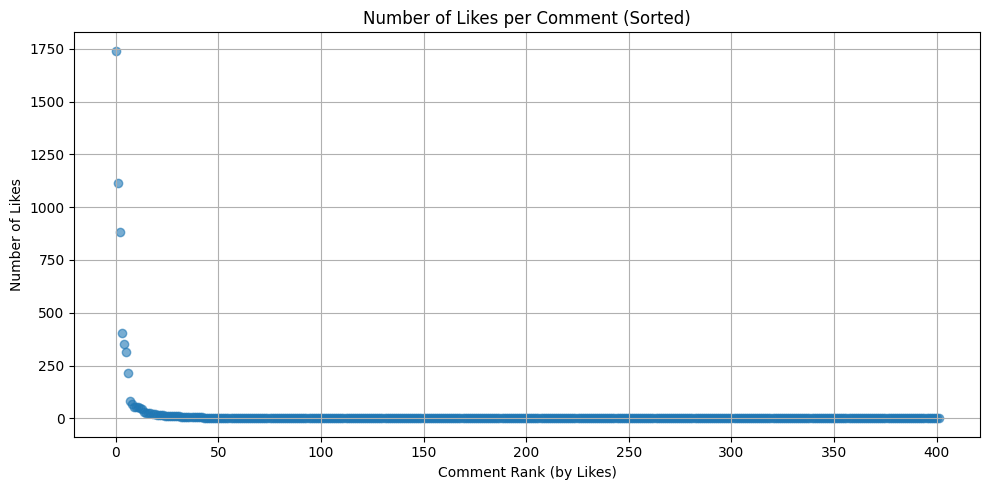

In [39]:
# visualize the distribution of likes by ranking the comments from highest to lowest.

plt.figure(figsize=(10, 5))
plt.scatter(range(len(sorted_likes_df)), sorted_likes_df['likes'], alpha=0.6)
plt.title('Number of Likes per Comment (Sorted)')
plt.xlabel('Comment Rank (by Likes)')
plt.ylabel('Number of Likes')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Key Takeaways:
# A few comments received a very high number of likes, dominating the chart.
# The majority of comments received very few likes, often below 10.
# This reflects a power-law distribution where attention is concentrated on a small subset.
# Relying only on top liked comments could skew the analysis of overall viewer sentiment.

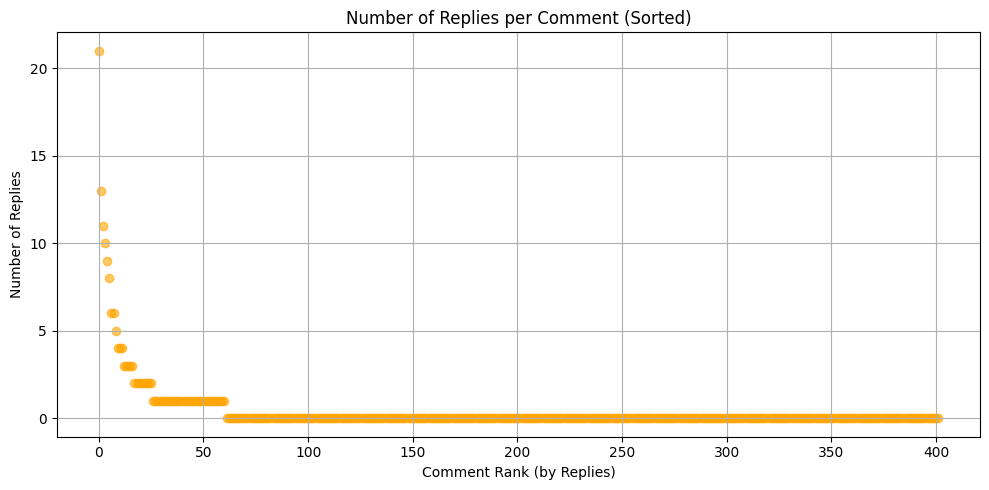

In [40]:
# visualize the distribution of replies by ranking the comments from highest to lowest.

plt.figure(figsize=(10, 5))
plt.scatter(range(len(sorted_replies_df)), sorted_replies_df['reply_count'], alpha=0.6, color='orange')
plt.title('Number of Replies per Comment (Sorted)')
plt.xlabel('Comment Rank (by Replies)')
plt.ylabel('Number of Replies')
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
# Key Takeaways:
# Most comments received 0 or 1 reply, showing limited engagement overall.
# A small number of comments received many replies, indicating high engagement outliers.
# This shows a long tail distribution engagement is not evenly spread.
# NOTE*: highly replied to comments may not reflect the general audience's sentiment.

# Step 5. Time-Series Analysis and Plot Chart.

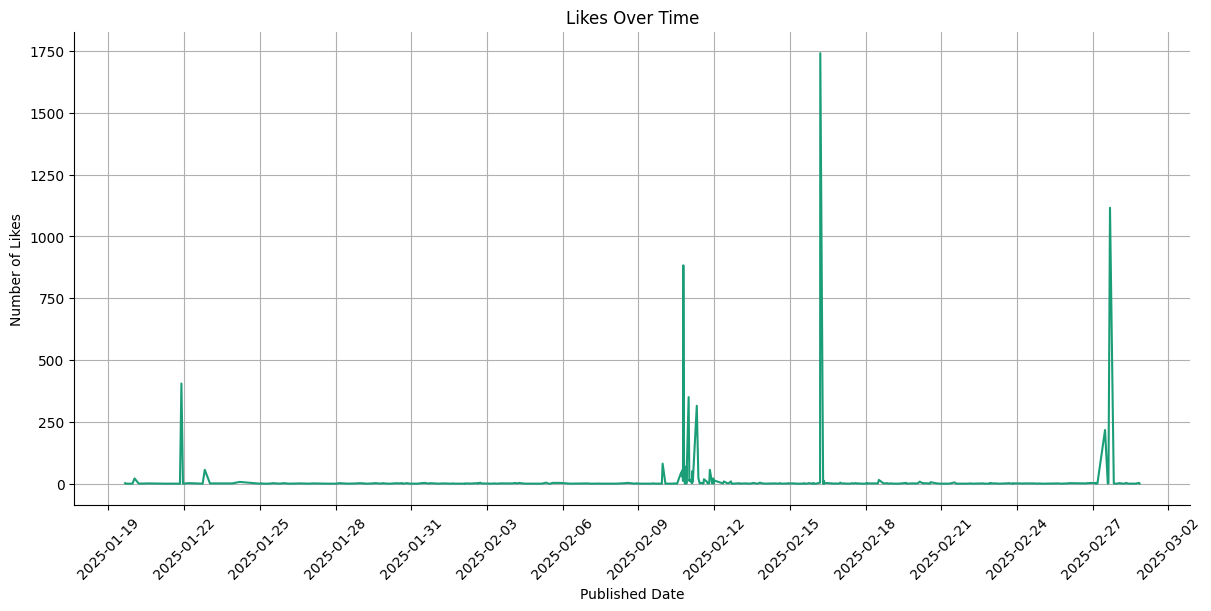

In [41]:
# 5-1. Visualize Engagement Over time.
# Draw a plot "Likes Over Time": published_at vs likes

from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker  # Needed for MaxNLocator

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['published_at']
    ys = series['likes']
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Sort by published date
df_sorted = filtered_df.sort_values('published_at', ascending=True)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')
_plot_series(df_sorted, 'Likes Over Time')

# Beautify
sns.despine(fig=fig, ax=ax)
plt.title('Likes Over Time')
plt.xlabel('Published Date')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45) # Rotates the x-axis labels (=published dates) 45 degrees counterclockwise.

# Limit number of x-axis labels
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=16))
# Here,(nbins=16) means the maximum number of x-axis ticks (labels) that matplotlib will try to display.
# That means, "show up to 16 evenly spaced labels on the x-axis, if space allows."

plt.grid(True)
plt.show()


**Key Takeaways**

*Major Spikes in Likes: There are a few dramatic spikes in likes, most notably around February 15 and February 27. This indicated that some comments gained viral traction or were particularly well received by viewers.

*Isolated Outliers: The overwhelming number of likes on certain days likely comes from one or two standout comments rather than widespread activity, suggesting a few voices dominated the conversation.

*Flat Baseline Activity: Outside of those spikes, the number of likes remained consistently low, reinforcing that most comments received minimal engagement.


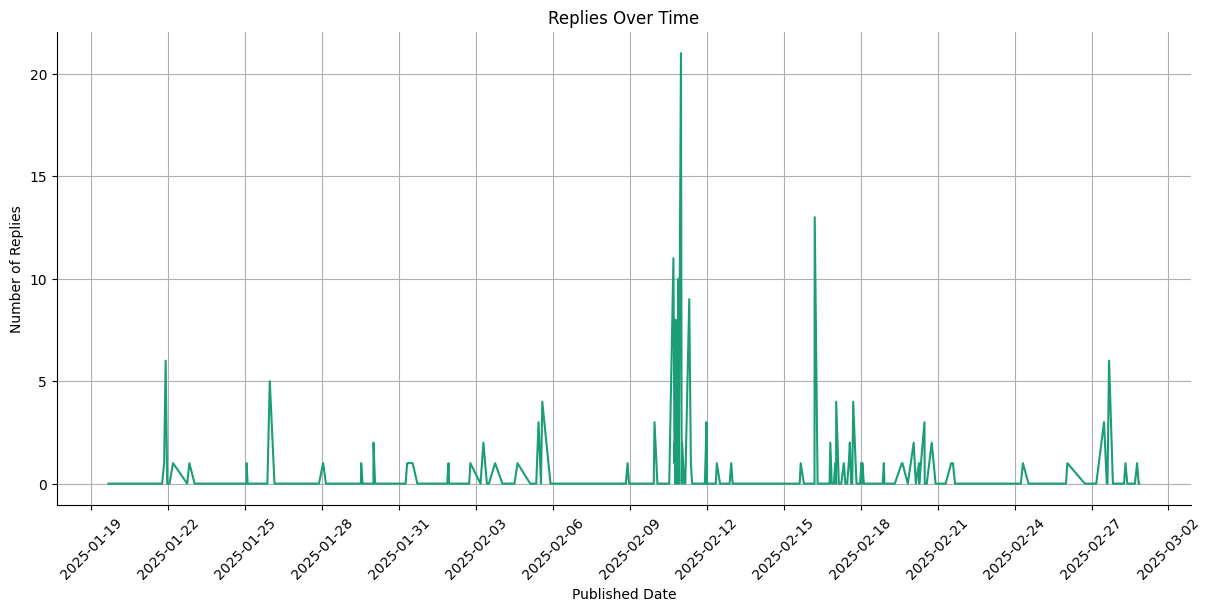

In [22]:
# 5-2. Draw a plot "Replies Over Time": published_at vs number of replies

from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker  # Needed for MaxNLocator

def _plot_series_replies(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['published_at']
    ys = series['reply_count']
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Sort by published date
df_sorted_replies = filtered_df.sort_values('published_at', ascending=True)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')
_plot_series_replies(df_sorted_replies, 'Replies Over Time')

# Beautify
sns.despine(fig=fig, ax=ax)
plt.title('Replies Over Time')
plt.xlabel('Published Date')
plt.ylabel('Number of Replies')
plt.xticks(rotation=45)  # Rotates the x-axis labels (=published dates) 45 degrees counterclockwise.

# 🔽 Limit number of x-axis labels
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=16))

plt.grid(True)
plt.show()

**Key Takeaways**

Low Volume Overall: Most comments received very few or no replies, indicating lower levels of back-and-forth discussion across the dataset.

*Isolated Spikes in Replies: A few noticeable spikes—particularly around early to mid-February—suggest that some comments sparked brief but intense engagement.

*Engagement Clusters: These reply spikes often happen in short windows, possibly linked to specific news, promotional pushes, or viral moments in the conversation.

*Temporal Relevance: The timing of these reply surges may align with marketing efforts or social media trends that reignited interest in the trailer.

*Implication for Analysis: Comments with many replies could represent influential or controversial opinions. Analyzing those could reveal deeper viewer sentiment.

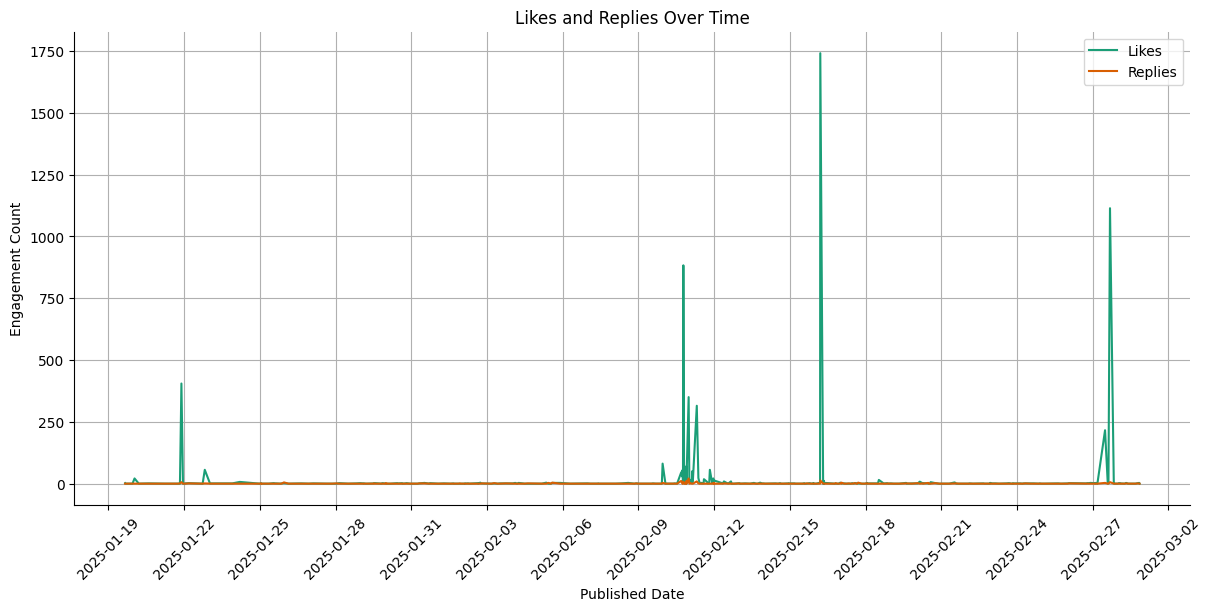

In [23]:
#Combined Plot: Likes and Replies Over Time

from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

def _plot_series(series, y_col, label, color_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))  # Use specific color palette
    xs = series['published_at'] # X-axis: date of comment
    ys = series[y_col]  # Y-axis: metric to plot (likes or replies)
    plt.plot(xs, ys, label=label, color=palette[color_index % len(palette)]) # Plot line

# Sort the data by published date
df_sortedbydate = filtered_df.sort_values('published_at', ascending=True)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')

# Plot Likes
_plot_series(df_sortedbydate, 'likes', 'Likes', color_index=0)

# Plot Replies
_plot_series(df_sortedbydate, 'reply_count', 'Replies', color_index=1)

# Beautify the plot
sns.despine(fig=fig, ax=ax)
plt.title('Likes and Replies Over Time')
plt.xlabel('Published Date')
plt.ylabel('Engagement Count')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=16))
plt.legend()
plt.grid(True)
plt.show()


In [42]:
# Key Takeaways:
# Engagement spikes likes and replies mostly come from a few standout comments, not broad activity.
# To dig deeper, scan df_sortedbydate for comments that have really high like or reply counts.
# If these outliers feel like they’re throwing off the overall vibe, you might want to leave them out of sentiment analysis.

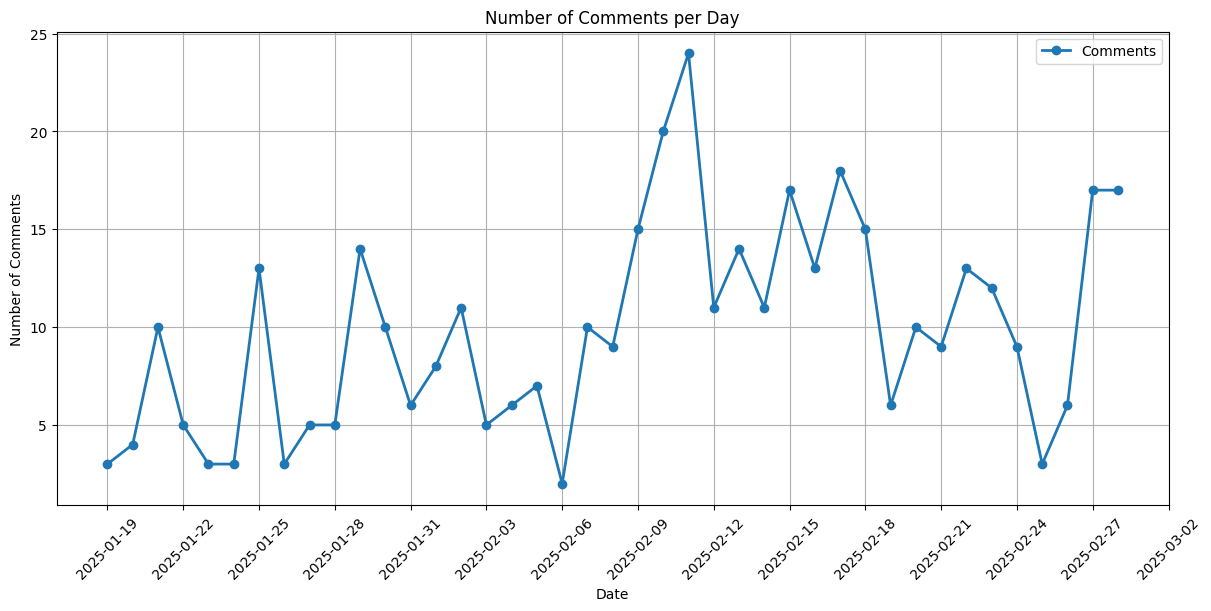

In [44]:
#Draw a Plot: "Number of Comments per Day"

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Ensure 'published_at' is in datetime format
filtered_df['published_at'] = pd.to_datetime(filtered_df['published_at'], errors='coerce')

# Count number of comments per day
comments_per_day = filtered_df.groupby(filtered_df['published_at'].dt.date).size()

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')
plt.plot(comments_per_day.index, comments_per_day.values, marker='o', linestyle='-', linewidth=2, label='Comments')

# Beautify the plot
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Day')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=16))  # Limit number of x-axis labels
plt.grid(True)
plt.legend()
plt.show()

# Key Takeaways from Step 3: Reflect on which time frame(s) best suit your research.

Reflection on Suitable Time Frame, engagement Trends:

*Initial Activity: There is a consistent but modest volume of comments starting
from mid-January through late February, suggesting a steady baseline engagement.

*Increased Engagement: Between February 6th and February 13th, comment frequency notably increased, indicating a potential reaction to promotional activities, increased marketing, or renewed viewer interest.

*Late Surge: Near the end of February, there's another spike in comment activity, potentially due to increased promotional efforts or viral attention, making this period particularly useful to explore viewer sentiment shifts.

*Optimal Analysis Window: The period from early to late February appears most suitable for in-depth analysis, as it captures both baseline engagement and clear spikes, allowing exploration of how promotional strategies may impact audience reaction.

In [51]:
# Store your data into CSV file.

df_sortedbydate.to_csv('final_minecraft_comments.csv', index=False)


In [52]:
from google.colab import files # Import the files module from Google Colab
files.download('final_minecraft_comments.csv') # Download the saved CSV file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>